## Problem statement

Predict future sales amount for specific User and Product Code based on last month sales.

## Exploratory analysis

In [16]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [63]:
df = pd.read_csv('/Users/dangloan/Documents/learning_analytics/project/3_data/black_friday/train.csv')
df_test = pd.read_csv('/Users/dangloan/Documents/learning_analytics/project/3_data/black_friday/test.csv')

In [3]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df,check_correlation = True)
profile.to_file(outputfile="output.html")

In [5]:
from IPython.display import HTML
HTML(filename='/Users/dangloan/Documents/learning_analytics/' \
                 'project/code/project_1/output.html')

Number of variables,12
Number of observations,550068
Total Missing (%),8.4%
Total size in memory,50.4 MiB
Average record size in memory,96.0 B
Numeric,6
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [103]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df_test,check_correlation = True)
profile

Number of variables,11
Number of observations,233599
Total Missing (%),9.1%
Total size in memory,19.6 MiB
Average record size in memory,88.0 B
Numeric,5
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,0


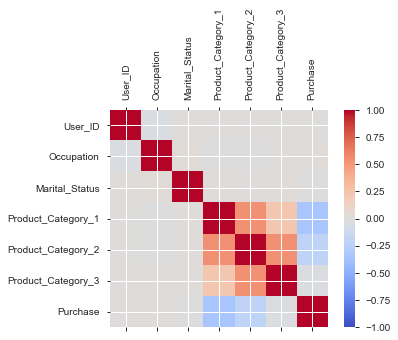

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [11]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


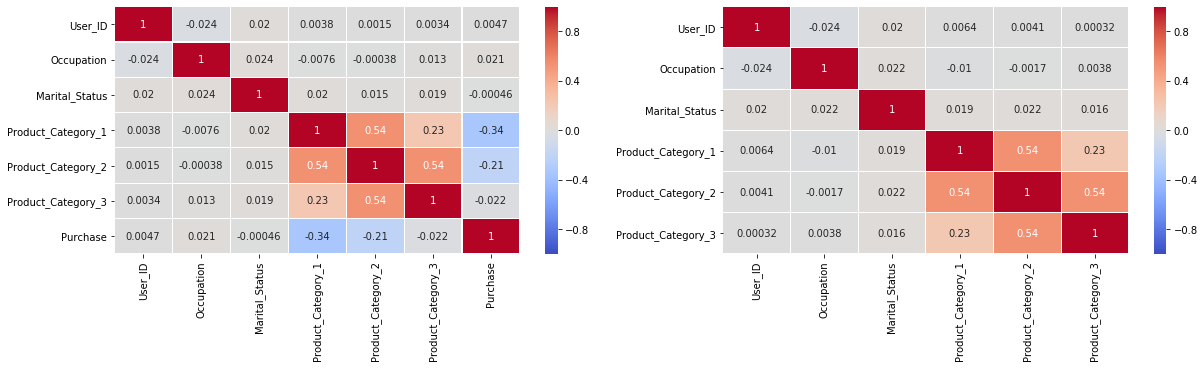

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)   #top left
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           linecolor='white',
           linewidths='0.1')

fig.add_subplot(222)   #top right
sns.heatmap(df_test.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           linecolor='white',
           linewidths='0.1')

plt.show()

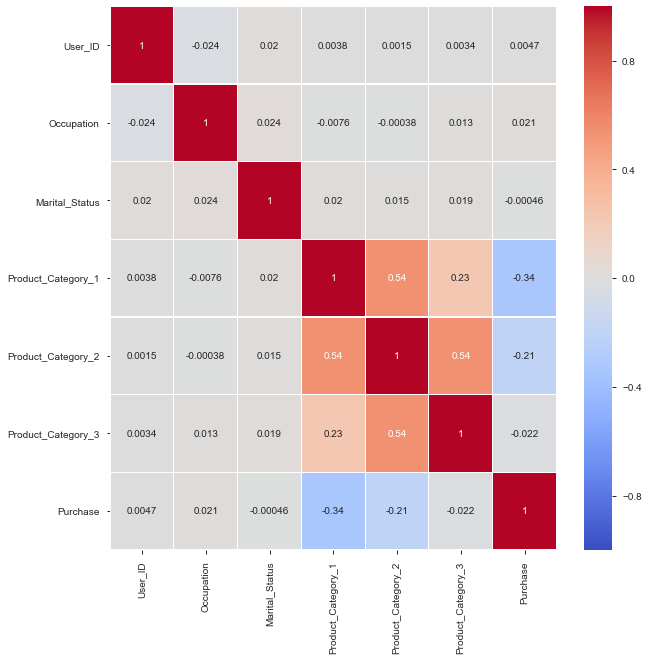

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))



sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           linecolor='white',
           linewidths='0.1')

In [56]:
Occ_stats = df.groupby('Occupation')['Purchase'].agg(['count','mean']).reset_index()\
        .sort_values('mean', ascending=False)
Occ_stats.columns = ['Occupation','Occ_count','Occ_mean']

,Occupation,count,mean
17,17,40043,9821.478236
12,12,31179,9796.640239
15,15,12165,9778.891163
8,8,1546,9532.592497
14,14,27309,9500.702772
7,7,59133,9425.728223
16,16,25371,9394.464349
5,5,12177,9333.149298
13,13,7728,9306.351061
6,6,20355,9256.535691


Text(0.5, 1.0, 'Purchase count and mean by Occupation codes')

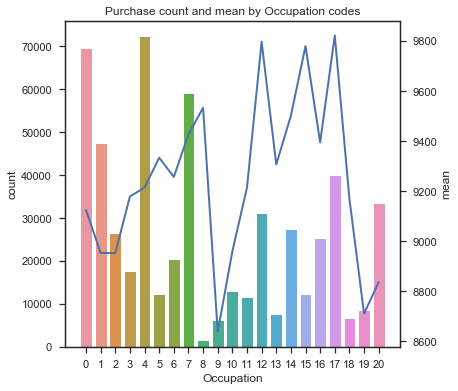

In [159]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10,10))
# fig, ax = plt.subplots(ncols=2)

sns.set(style="ticks", rc={"lines.linewidth": 2})
fig, ax1 = plt.subplots(figsize=(6,6))
ax2 = ax1.twinx()

sns.barplot(x='Occupation', y='count', data=c, ax = ax1)
sns.lineplot(x='Occupation',y='mean', data=c, ax=ax2)
plt.title('Purchase count and mean by Occupation codes')
# plt.show()
# sns.set()

There are some differences in Purchase amount (mean) between different Occupations. I observe Occupation code 8 and 9 have some fluctuations in mean that could due to small number of Purchase (count), the rest are fine.

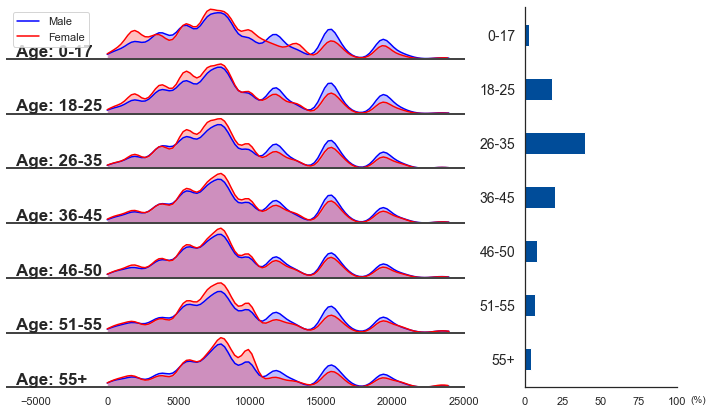

In [37]:
import matplotlib.gridspec as gridspec

freq = ((df.Age.value_counts(normalize = True).reset_index().sort_values(by = 'index').Age)*100).tolist()
number_gp = 7
# freq = the percentage for each age group, and there’re 7 age groups.


def ax_settings(ax, var_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(2)
    
    ax.text(0.02, 0.05, var_name, fontsize=17, fontweight="bold", transform = ax.transAxes) 
    return None
# Manipulate each axes object in the left. Try to tune some parameters and you'll know how each command works.


fig = plt.figure(figsize=(12,7))
gs = gridspec.GridSpec(nrows=number_gp, 
                       ncols=2, 
                       figure=fig, 
                       width_ratios= [3, 1],
                       height_ratios= [1]*number_gp,
                       wspace=0.2, hspace=0.05
                      )
ax = [None]*(number_gp + 1)
features = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
# Create a figure, partition the figure into 7*2 boxes, set up an ax array to store axes objects, and create a list of age group names.  


for i in range(number_gp):
    ax[i] = fig.add_subplot(gs[i, 0])
    
    ax_settings(ax[i], 'Age: ' + str(features[i]), -7000, 25000)    
    
    sns.kdeplot(data=df[(df.Gender == 'M') & (df.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="blue", bw=0.1, legend=False)
    sns.kdeplot(data=df[(df.Gender == 'F') & (df.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="red", bw=0.1,  legend=False)
    
    if i < (number_gp - 1): 
        ax[i].set_xticks([])
# this 'for loop' is to create a bunch of axes objects, and link them to GridSpec boxes. Then, we manipulate them with sns.kdeplot() and ax_settings() we just defined.

ax[0].legend(['Male', 'Female'], facecolor='w')
# adding legends on the top axes object  

ax[number_gp] = fig.add_subplot(gs[:, 1])
ax[number_gp].spines['right'].set_visible(False)
ax[number_gp].spines['top'].set_visible(False)
ax[number_gp].barh(features, freq, color='#004c99', height=0.4)
ax[number_gp].set_xlim(0,100)
ax[number_gp].invert_yaxis()
ax[number_gp].text(1.09, -0.04, '(%)', fontsize=10, transform = ax[number_gp].transAxes)   
ax[number_gp].tick_params(axis='y', labelsize = 14)
# manipulate the bar plot on the right. Try to comment out some of the commands to see what they actually do to the bar plot.

plt.show()

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


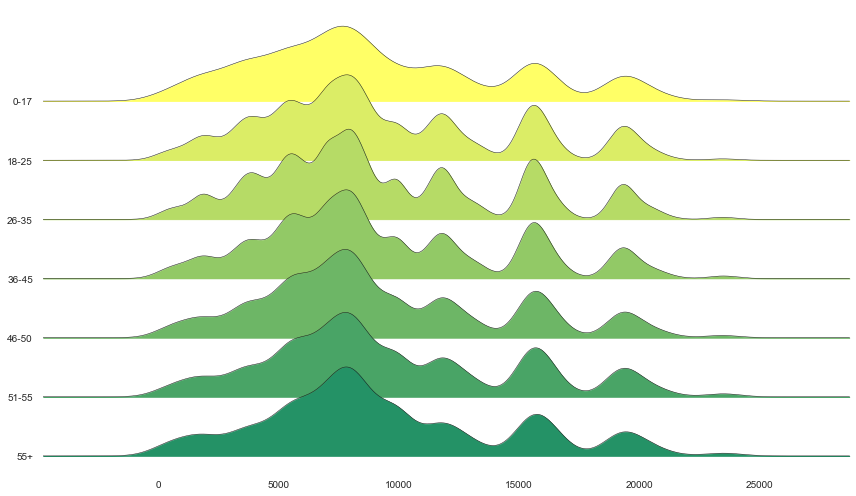

In [35]:
import joypy
from matplotlib import cm
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(12,7))
ax2 = ax1.twinx()

joypy.joyplot(df[df.Gender == 'M'], by='Age', column='Purchase',ax=ax1,
              linewidth=0.5,
             colormap=cm.summer_r)
# joypy.joyplot(df[df.Gender == 'F'], by='Age', column='Purchase',ax=ax2,
#               linewidth=0.5,
#              color='#69b3a2')

ax[0].legend(['Male', 'Female'], facecolor='w')
plt.show()

I am going to encode categorical columns using One Hot: Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status. For high cadinarity columns (Produc Cat) I am searching for a better solution. May need to look at some statistics to group them.
In the correlation report, there are some correlations between Product Cats and Purchase. I may look deeper into that.

Spend more time looking at your data and manipulating it into the format you need. Most projects involve a lot of data manipulation and relatively little model tuning. Friends who are currently hiring tell me many job candidates can describe algorithms, but the vast majority lack the Pandas skills to be efficient with real work.
https://towardsdatascience.com/what-70-of-data-science-learners-do-wrong-ac35326219e4

The last model didn't work well because of underfitting. I certainly did wrong in feature extraction. Trying to look at the data closer.

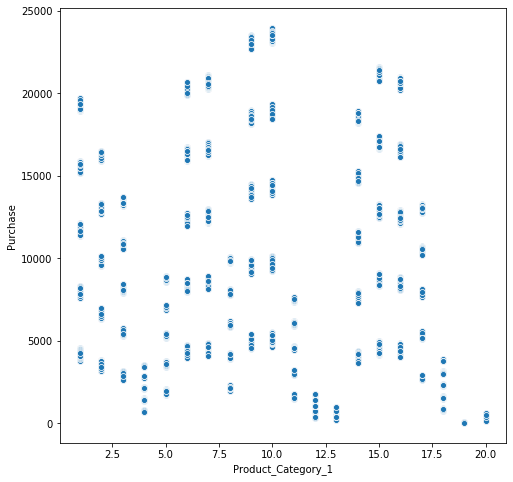

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.scatterplot(df['Product_Category_1'], df['Purchase'])
plt.show()

In [5]:
a = df['Product_Category_1'].value_counts().reset_index()
a.columns=['Product_Category_1','count']
a.Product_Category_1.dtype

dtype('int64')

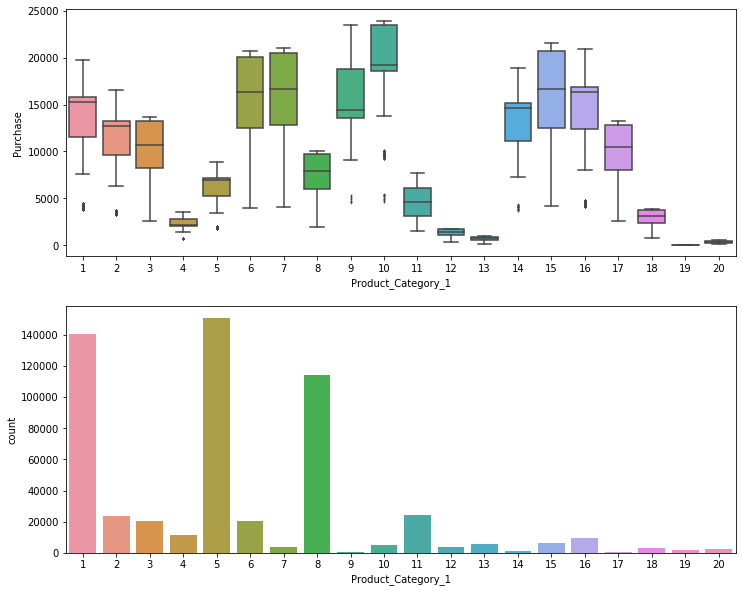

In [11]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
sns.boxplot(x="Product_Category_1", y="Purchase", data=df, fliersize='0.5')

ax2 = fig.add_subplot(212)
sns.barplot(a['Product_Category_1'],a['count'])


# ax1 = fig.add_subplot(221)
# ax2 = fig.add_subplot(222)
# ax3 = fig.add_subplot(212)

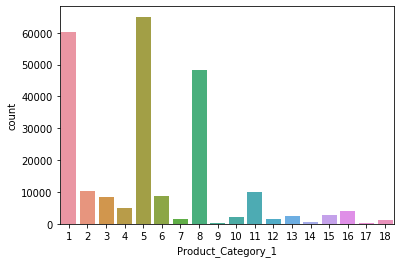

In [13]:
b = df_test['Product_Category_1'].value_counts().reset_index()
b.columns=['Product_Category_1','count']
b.Product_Category_1.dtype

sns.barplot(b['Product_Category_1'], b['count'])

In [ ]:
sns.swarmplot(x="Product_Category_1", y="Purchase", data=df, color=".25")

In [94]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


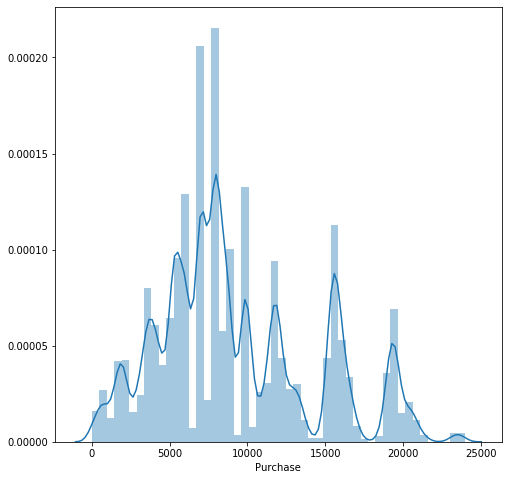

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.distplot(df['Purchase'])
plt.show()

In [55]:
df['ID'] = df['User_ID'].apply(str) + df['Product_ID'].apply(str)
print(df.shape)
print(df['ID'].nunique())

(550068, 13)
550068


In [56]:
df.ID.head()

0    1000001P00069042
1    1000001P00248942
2    1000001P00087842
3    1000001P00085442
4    1000002P00285442
Name: ID, dtype: object

In [57]:
df.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [82]:
a = df.groupby('Purchase')['Product_ID'].nunique().reset_index()
a.columns =['Purchase_point','count']

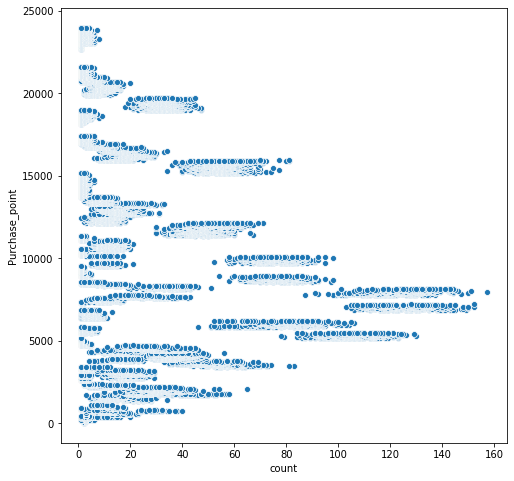

In [85]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(y='Purchase_point', x='count', data=a)

In [222]:
a = df.groupby('Product_ID')['Purchase'].agg({'count','mean'}).reset_index()
a.columns =['Product_ID','Prod_count','Prod_mean']
# b = a[a['Prod_count'] <= 200]
b= copy.deepcopy(a)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
c= scaler.fit_transform(b[['Prod_count','Prod_mean']])

kmeans = KMeans(n_clusters=5)  
kmeans.fit(c)

c_df = pd.DataFrame(c)

c_df['cluster'] = kmeans.labels_
c_df = pd.concat([c_df.reset_index(drop=True), 
                  b[['Product_ID']].reset_index(drop=True)],
                 axis=1,ignore_index= True)

c_df.columns = ['Prod_count','Prod_mean','cluster','Product_ID']

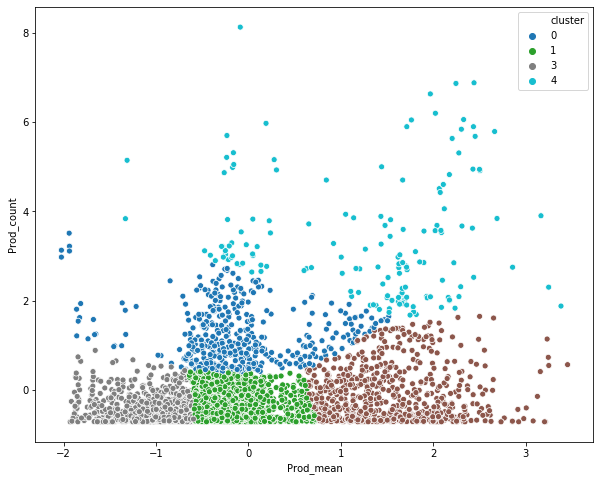

In [223]:
plt.figure(figsize=(10,8))
sns.scatterplot(c_df['Prod_mean'], c_df['Prod_count'], hue=c_df['cluster'],palette='tab10')

In [18]:
e = df.groupby('Purchase')['User_ID'].nunique().reset_index()
e.columns =['Purchase_point','count']

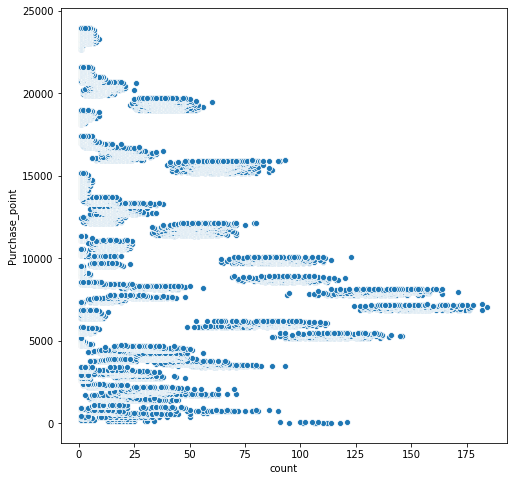

In [19]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(y='Purchase_point', x='count', data=e)

In [23]:
e = df.groupby('User_ID')['Purchase'].agg({'count','mean'}).reset_index()
e.columns =['User_ID','U_count','U_mean']
# b = a[a['Prod_count'] <= 200]
f= copy.deepcopy(e)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
g= scaler.fit_transform(f[['U_count','U_mean']])

kmeans = KMeans(n_clusters=6)  
kmeans.fit(g)

g_df = pd.DataFrame(g)

g_df['cluster'] = kmeans.labels_
g_df = pd.concat([g_df.reset_index(drop=True), 
                  f[['User_ID']].reset_index(drop=True)],
                 axis=1,ignore_index= True)

g_df.columns = ['U_count','U_mean','cluster','U_ID']

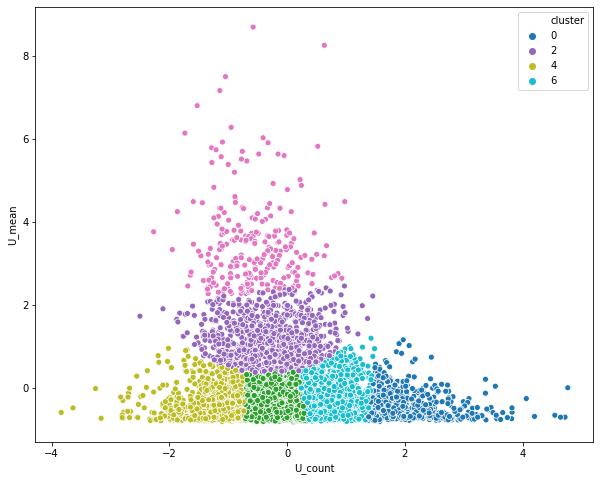

In [76]:
plt.figure(figsize=(10,8))
sns.scatterplot(g_df['U_count'], g_df['U_mean'], hue=g_df['cluster'],palette='tab10')

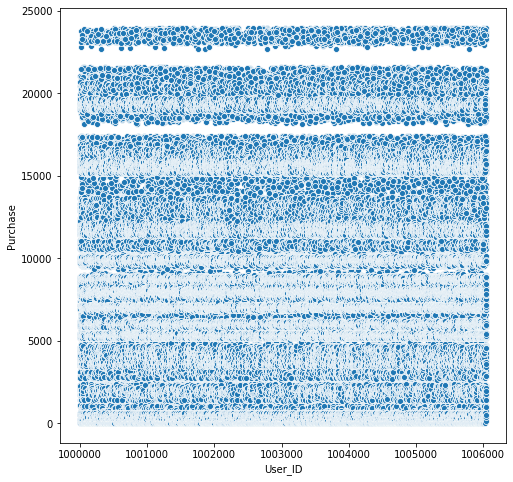

In [17]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(y='Purchase', x='User_ID', data=df)

#### Cluster Product_ID into groups that have different level of purchase

In [68]:
df.columns.tolist()

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

My approach is to try plug the data into a model: a **linear regression** and an **xgboost regression**. Encode categorical data as above.
Which error metric should I prefer?
How to choose the best feature (feature selection)? Use the pipeline. If not good, try look at the data and do univariate analysis.
Tune the model -> grid search

## Develop XGBoost regression model with sklearn pipeline

## Develop XGBoost regression model

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict

### Read train and test sets

In [74]:
path = '/Users/dangloan/Documents/learning_analytics/project/'
df = pd.read_csv(path + '3_data/black_friday/train.csv')
df_test = pd.read_csv(path + '3_data/black_friday/test.csv')

In [52]:
every_column_except_y = [col for col in df.columns if col not in []]
column_y = ['Purchase']

X = df[every_column_except_y]
y = df[column_y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(440054, 12)
(110014, 12)
(440054, 1)
(110014, 1)


### Encode categorical features

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def cluster(df,train,test, variable):
    a = df.groupby(variable)['Purchase'].agg({'count','mean'}).reset_index()
    count = variable + '_count'
    mean = variable + '_mean'
    cluster = variable + '_cluster'
    a.columns =[variable,count,mean]

    scaler = StandardScaler()
    b = scaler.fit_transform(a[[count,mean]])

    kmeans = KMeans(n_clusters=5)  
    kmeans.fit(b)

    b_df = pd.DataFrame(b)

    b_df['cluster'] = kmeans.labels_
    b_df = pd.concat([b_df.reset_index(drop=True), 
                      a[[variable]].reset_index(drop=True)],
                     axis=1,ignore_index= True)

    b_df.columns = [count,mean,cluster, variable]

    train_result = train.merge(b_df[[variable, cluster]],
                           on=variable, how='left')
    test_result = test.merge(b_df[[variable, cluster]],
                           on=variable, how='left')
    return train_result, test_result

X_train1, X_test1 = cluster(X_train,X_train,X_test,'Product_ID')
X_train1, X_test1 = cluster(X_train,X_train1,X_test1,'User_ID')

In [55]:
def clean(df_stat, df):
    #Compute counts for high cardinality artributes
    Occ_stats = df_stat.groupby('Occupation')['Purchase'].agg(['count','mean','std']).reset_index()
    Occ_stats.columns = ['Occupation','Occ_count','Occ_mean','Occ_std']

    Cat1_stats = df_stat.groupby('Product_Category_1')['Purchase'].agg(['count','mean','std']).reset_index()
    Cat1_stats.columns = ['Product_Category_1','Cat1_count','Cat1_mean','Cat1_std']

    Cat2_stats = df_stat.groupby('Product_Category_2')['Purchase'].agg(['count','mean','std']).reset_index()
    Cat2_stats.columns = ['Product_Category_2','Cat2_count','Cat2_mean','Cat2_std']

    Cat3_stats = df_stat.groupby('Product_Category_3')['Purchase'].agg(['count','mean','std']).reset_index()
    Cat3_stats.columns = ['Product_Category_3','Cat3_count','Cat3_mean','Cat3_std']
    
    ProdID_stats = df_stat.groupby('Product_ID')['Purchase'].agg(['count']).reset_index()
    ProdID_stats.columns = ['Product_ID', 'ProdID_count']
    
    UserID_stats = df_stat.groupby('User_ID')['Purchase'].agg(['count']).reset_index()
    UserID_stats.columns = ['User_ID', 'UserID_count']

    df1 = df.merge(ProdID_stats,on='Product_ID', how='left')\
                    .merge(UserID_stats,on='User_ID', how='left')\
                    .merge(Occ_stats,on='Occupation', how='left')\
                    .merge(Cat1_stats,on='Product_Category_1', how='left')\
                    .merge(Cat2_stats,on='Product_Category_2', how='left')\
                    .merge(Cat3_stats,on='Product_Category_3', how='left')


#    #Taking care of missing data
#     cols = ['Occ_count','Cat1_count',
#             'Cat2_count','Cat3_count']
#     from sklearn.preprocessing import Imputer
#     imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
#     imputer = imputer.fit(df1[cols])
#     df1[cols] = imputer.transform(df1[cols])
#     df1[cols] = df1[cols].fillna(0)
    df1.fillna(0,inplace=True)
    
    
    df1['Stay_In_Current_City_Years'] = df1['Stay_In_Current_City_Years'].str.strip("+")
    df1['Stay_In_Current_City_Years'] = pd.to_numeric(df1['Stay_In_Current_City_Years'])
    df1.loc[df1['Stay_In_Current_City_Years'] == 4, "Stay_In_Current_City_Years"] = 10

    
    #transform age
    age_map = { '0-17' : 17, 
                  '18-25' : 25, 
                  '26-35' : 35, 
                  '36-45' : 45, 
                  '46-50' : 50,
                  '51-55' : 55,
                  '55+' : 70}

    df1['Age_mapped'] = df1['Age'].map(age_map)
    
    df1 = df1.drop(['Product_ID','User_ID','Purchase','Age','Occupation','Product_Category_1',
              'Product_Category_2','Product_Category_3'], axis=1)

    return df1

X_train1 = clean(X_train,X_train1)
X_test1 = clean(X_train,X_test1)

In [58]:
import category_encoders as ce
onehot_cols = ['Gender','City_Category']
ce_one_hot = ce.OneHotEncoder(cols = onehot_cols)
X_train1 = ce_one_hot.fit_transform(X_train1)
X_test1 = ce_one_hot.fit_transform(X_test1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.fit_transform(X_test1)

### Modeling

In [ ]:
model1 = xgboost.XGBRegressor(colsample_bytree=0.8,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
model1.fit(X_train_scaled,y_train)

# Predict
predictions = model1.predict(X_test_scaled)

#Evaluate
print (model1.score(X_train_scaled, y_train))
print (model1.score(X_test_scaled, y_test))

# from sklearn.metrics import mean_squared_error
print(r2_score(predictions, y_test))

mse = mean_squared_error(predictions,y_test)
print(np.sqrt(mse))

[21:46:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [77]:
model1 = xgboost.XGBRegressor()
model1.fit(X_train_scaled,y_train)

# Predict
predictions = model1.predict(X_test_scaled)

#Evaluate
print (model1.score(X_train_scaled, y_train))
print (model1.score(X_test_scaled, y_test))

# from sklearn.metrics import mean_squared_error
print(r2_score(predictions, y_test))

mse = mean_squared_error(predictions,y_test)
print(np.sqrt(mse))

[21:26:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7104449589205256
0.6995114215578282
0.5611657389176552
2747.75000561038


In [71]:
import pickle
# # save model to file
# pickle.dump(model1, open(path + '2_code/project_1/model4.pickle.dat', 'wb'))

# load model from file
model1 = pickle.load(open(path + '2_code/project_1/model4.pickle.dat', 'rb'))

[21:09:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [65]:
X_train1.head()

,Gender_1,Gender_2,City_Category_1,City_Category_2,City_Category_3,Stay_In_Current_City_Years,Marital_Status,Product_ID_cluster,User_ID_cluster,ProdID_count,UserID_count,Occ_count,Occ_mean,Occ_std,Cat1_count,Cat1_mean,Cat1_std,Cat2_count,Cat2_mean,Cat2_std,Cat3_count,Cat3_mean,Cat3_std,Age_mapped
0,1,0,1,0,0,3,1,2,0,154,251,47194,9434.926643,5094.927431,112330,13610.155684,4288.311900,30274.0,10353.139658,5594.536611,0.0,0.000000,0.000000,55
1,1,0,0,1,0,10,0,3,2,516,58,25020,9797.335691,5137.213289,120631,6236.131417,1910.299020,0.0,0.000000,0.000000,0.0,0.000000,0.000000,25
2,1,0,1,0,0,1,0,0,4,29,370,9807,9344.067911,4996.987402,91126,7499.600641,2013.649156,43897.0,7092.874957,3236.040248,13269.0,11761.739166,5081.664057,35
3,1,0,1,0,0,2,0,1,2,652,100,57816,9229.714179,5054.664524,91126,7499.600641,2013.649156,0.0,0.000000,0.000000,0.0,0.000000,0.000000,25
4,1,0,1,0,0,1,0,2,2,124,83,57816,9229.714179,5054.664524,112330,13610.155684,4288.311900,51308.0,10260.907246,5309.731382,0.0,0.000000,0.000000,25


In [70]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_scaled,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

KeyboardInterrupt: 

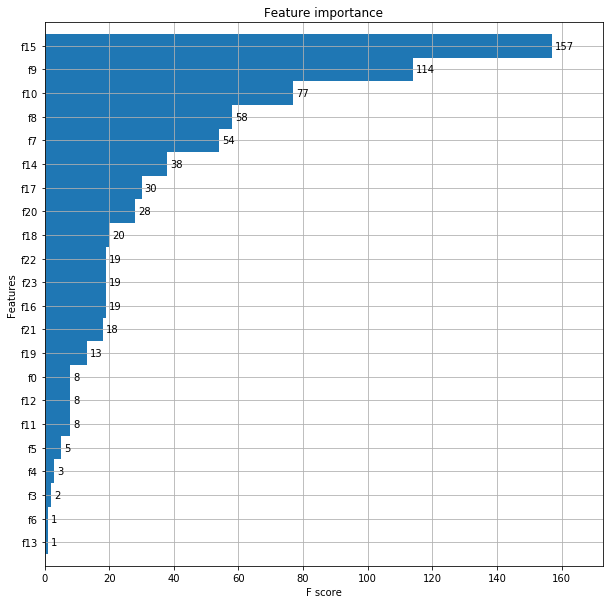

In [61]:
figsize=(10,10)
fig, ax = plt.subplots(1,1,figsize=figsize)
plot_importance(model1, ax=ax,height = 1)

In [62]:
# Calculate feature importances
importances = model1.feature_importances_
# importances = model1.get_booster().get_score(importance_type='weight')

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train1.columns[i] for i in indices]


a=list(zip(names,importances[indices]))
a

[('Cat1_mean', 0.59158295),
 ('Cat1_count', 0.17366129),
 ('Product_ID_cluster', 0.11194081),
 ('ProdID_count', 0.0380909),
 ('User_ID_cluster', 0.024187792),
 ('Occ_std', 0.0069699935),
 ('Cat3_count', 0.005563984),
 ('Cat1_std', 0.0052751587),
 ('Cat2_count', 0.0046565305),
 ('UserID_count', 0.0046390533),
 ('Age_mapped', 0.0038563535),
 ('Cat2_std', 0.0035769783),
 ('City_Category_2', 0.0034979414),
 ('Cat3_std', 0.0034343645),
 ('Cat3_mean', 0.0033740113),
 ('Cat2_mean', 0.0032811423),
 ('Occ_mean', 0.0026854614),
 ('Occ_count', 0.002677319),
 ('City_Category_3', 0.0023398811),
 ('Stay_In_Current_City_Years', 0.0022695877),
 ('Gender_1', 0.0022088306),
 ('Marital_Status', 0.00022958335),
 ('City_Category_1', 0.0),
 ('Gender_2', 0.0)]

In [63]:
np.argsort(importances)

array([ 1,  2,  6,  0,  5,  4, 11, 12, 18, 21, 22,  3, 19, 23, 10, 17, 16,
       20, 13,  8,  9,  7, 14, 15])

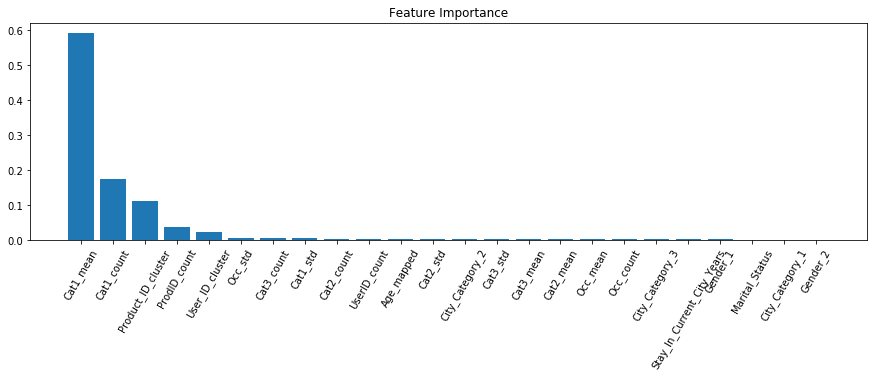

In [64]:
# Create plot
plt.figure(figsize=(15,4))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train1.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train1.shape[1]), names, rotation=60)

# Show plot
plt.show()

In [59]:
importances[indices]

array([0.49031913, 0.2860852 , 0.03974045, 0.03458342, 0.02441232,
       0.01762894, 0.01668114, 0.01507434, 0.01062152, 0.01010393,
       0.00786273, 0.00584874, 0.00576012, 0.00530911, 0.00527239,
       0.00517802, 0.00506794, 0.00489141, 0.00481271, 0.00474642],
      dtype=float32)

#### Cross validation evaluation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def cluster(df, variable):
    a = df.groupby(variable)['Purchase'].agg({'count','mean'}).reset_index()
    count = variable + '_count'
    mean = variable + '_mean'
    cluster = variable + '_cluster'
    a.columns =[variable,count,mean]

    scaler = StandardScaler()
    b = scaler.fit_transform(a[[count,mean]])

    kmeans = KMeans(n_clusters=5)  
    kmeans.fit(b)

    b_df = pd.DataFrame(b)

    b_df['cluster'] = kmeans.labels_
    b_df = pd.concat([b_df.reset_index(drop=True), 
                      a[[variable]].reset_index(drop=True)],
                     axis=1,ignore_index= True)

    b_df.columns = [count,mean,cluster, variable]

    train_result = train.merge(b_df[[variable, cluster]],
                           on=variable, how='left')
    test_result = test.merge(b_df[[variable, cluster]],
                           on=variable, how='left')
    return train_result, test_result

X_train1, X_test1 = cluster(X_train,X_train,X_test,'Product_ID')
X_train1, X_test1 = cluster(X_train,X_train1,X_test1,'User_ID')

In [ ]:
import category_encoders as ce
onehot_cols = ['Gender','City_Category']
ce_one_hot = ce.OneHotEncoder(cols = onehot_cols)
X_train1 = ce_one_hot.fit_transform(X_train1)
X_test1 = ce_one_hot.fit_transform(X_test1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.fit_transform(X_test1)

In [ ]:
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# # load data
# dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# # split data into X and y
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # CV model
# model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### Linear Regression Model

In [238]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)



# Predict
predictions = lr_model.predict(X_test_scaled)

#Evaluate
print ('Training error')
print (lr_model.score(X_train_scaled, y_train))

print ('Test error')
print (lr_model.score(X_test_scaled, y_test))

# from sklearn.metrics import mean_squared_error
print("R_squared")
print(r2_score(predictions, y_test))

mse = mean_squared_error(predictions,y_test)
print('Mean_squared_error')
print(np.sqrt(mse))

Training error
0.6701867064690539
Test error
-5.225896502284424e+19
R_squared
1.2448375663609568e-11
Mean_squared_error
36236282354835.65


In [166]:
r_sq

0.009895595196476759

In [ ]:
X_train_scaled